In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import sys
import importlib
sys.path.append('../')

import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\USUARIO\\Desktop\\Projects\\4Geeks_temporal_series\\src\\aquifer\\..\\utils.py'>

In [16]:
df = pd.read_csv('../../data/raw/Aquifer_Doganella.csv')
df = utils.turn_column_into_date(df, 'Date')
df.head()

,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.30,8.60
2004-01-02,0.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70,6.25
2004-01-03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,9.80
2004-01-04,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.95
2004-01-05,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,5.85


# Valores faltantes

In [17]:
utils.get_null_percentage_per_column(df)

Volume_Pozzo_1                  77.497511
Volume_Pozzo_7                  77.431132
Volume_Pozzo_8                  77.431132
Volume_Pozzo_5+6                77.431132
Volume_Pozzo_4                  77.431132
Volume_Pozzo_3                  77.431132
Volume_Pozzo_2                  77.431132
Volume_Pozzo_9                  77.431132
Depth_to_Groundwater_Pozzo_7    61.649519
Depth_to_Groundwater_Pozzo_9    61.184866
Depth_to_Groundwater_Pozzo_4    60.604049
Depth_to_Groundwater_Pozzo_6    59.707932
Depth_to_Groundwater_Pozzo_5    58.380352
Depth_to_Groundwater_Pozzo_1    57.899104
Depth_to_Groundwater_Pozzo_8    57.666777
Depth_to_Groundwater_Pozzo_2    54.596747
Depth_to_Groundwater_Pozzo_3    53.966147
Temperature_Velletri            27.265184
Temperature_Monteporzio         24.261533
Rainfall_Velletri               10.819781
Rainfall_Monteporzio            10.404912
dtype: float64

In [18]:
df = utils.remove_columns_with_nulls_percent(df, threshold=50)
df = utils.interpolate_df(df)

Columnas eliminadas por alto porcentaje de valores nulos (50%): ['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8', 'Depth_to_Groundwater_Pozzo_9', 'Volume_Pozzo_1', 'Volume_Pozzo_2', 'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6', 'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9']
Valores nulos después de la interpolación:
Series([], dtype: int64)


c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\aquifer\..\utils.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Relleno hacia adelante
c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\aquifer\..\utils.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Relleno hacia atrás


In [19]:
utils.get_null_percentage_per_column(df)

Rainfall_Monteporzio       0.0
Rainfall_Velletri          0.0
Temperature_Monteporzio    0.0
Temperature_Velletri       0.0
dtype: float64

# Análisis de tendencias

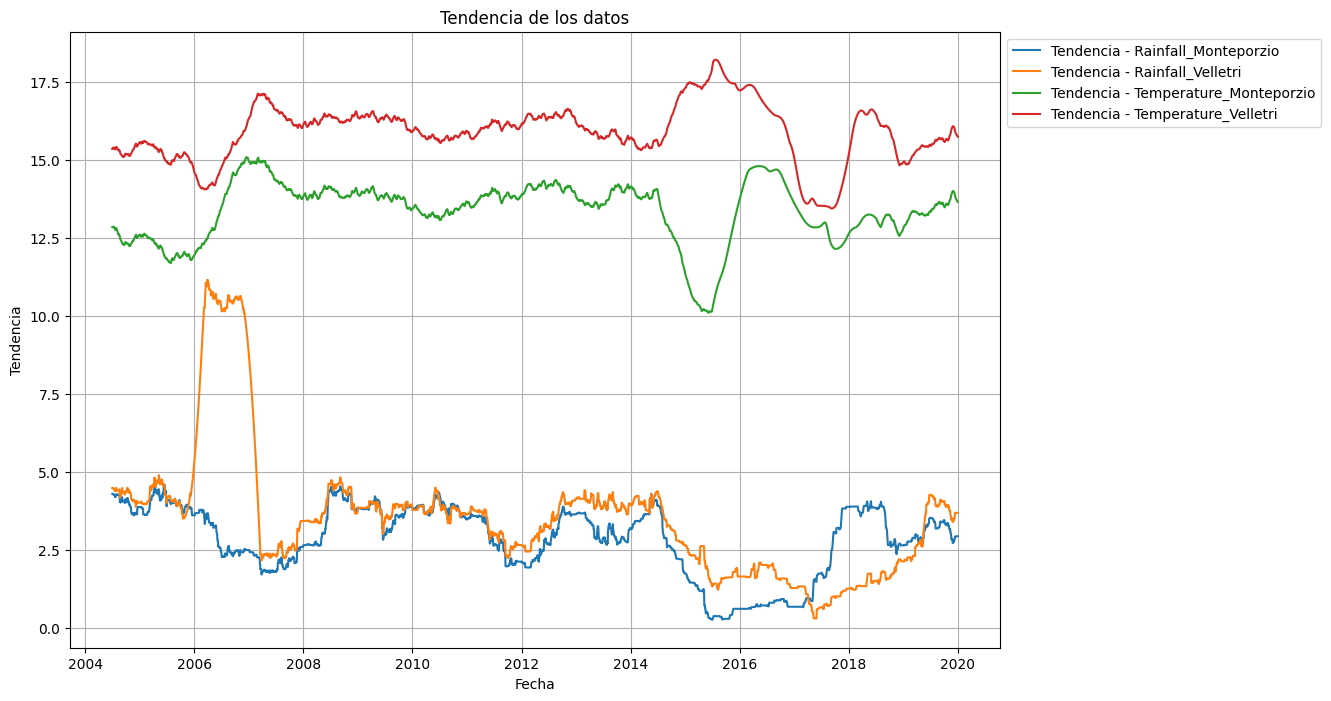

In [20]:
utils.plot_trend(df, period=365)

# Análisis de estacionalidad

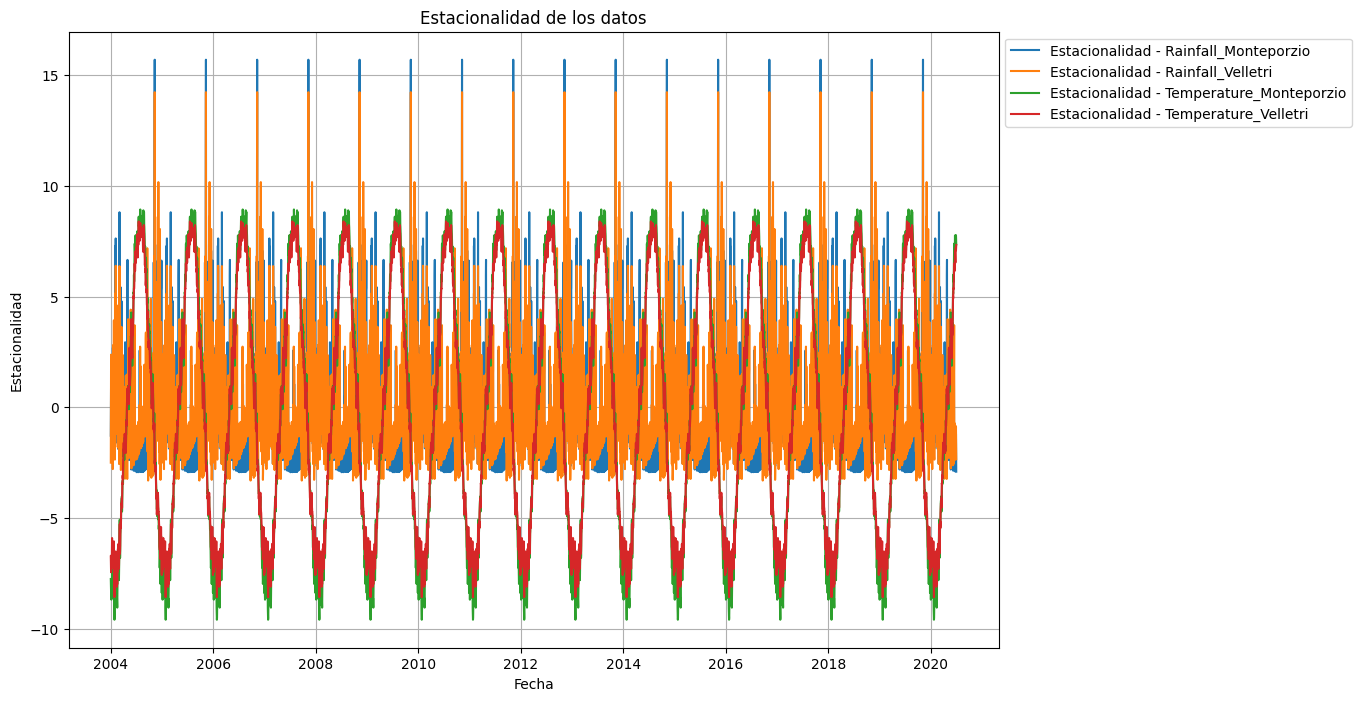

In [21]:
utils.plot_seasonality(df, period=365)

# Prueba de estacionariedad

In [22]:
utils.test_stationarity(df)

Resultados de la prueba de Dickey-Fuller para 'Rainfall_Monteporzio':
Test Statistic                -1.055126e+01
p-value                        8.164912e-19
#Lags Used                     3.100000e+01
Number of Observations Used    5.994000e+03
Critical Value (1%)           -3.431441e+00
Critical Value (5%)           -2.862022e+00
Critical Value (10%)          -2.567027e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Rainfall_Velletri':
Test Statistic                -8.434232e+00
p-value                        1.835062e-13
#Lags Used                     2.700000e+01
Number of Observations Used    5.998000e+03
Critical Value (1%)           -3.431441e+00
Critical Value (5%)           -2.862022e+00
Critical Value (10%)          -2.567027e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Temperat

# Análisis de variabilidad

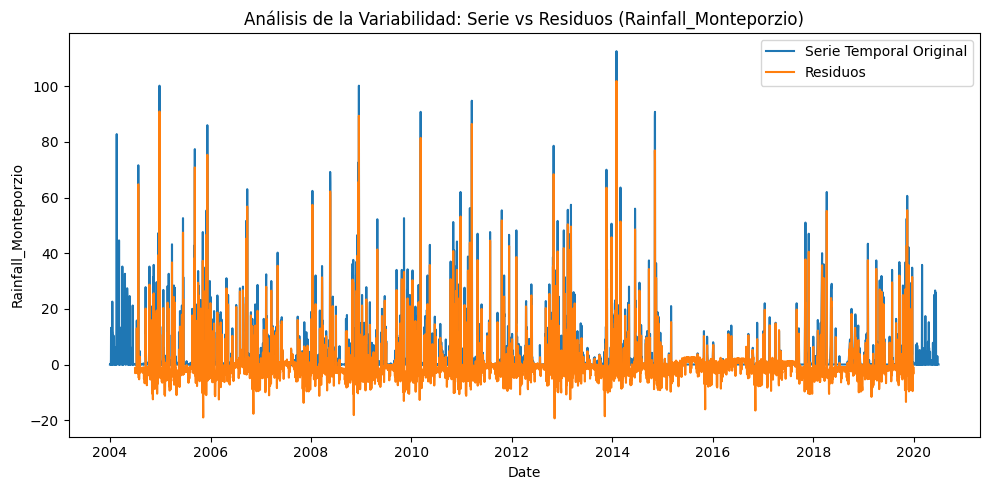

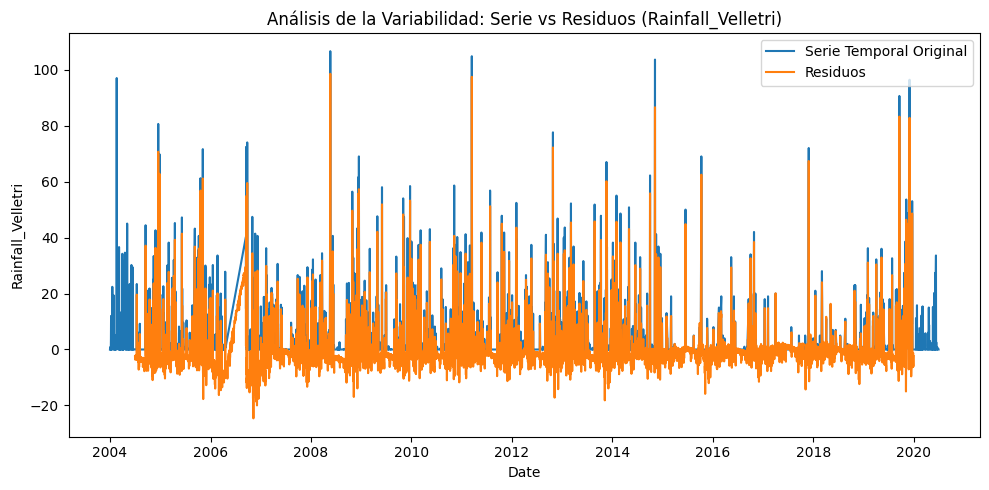

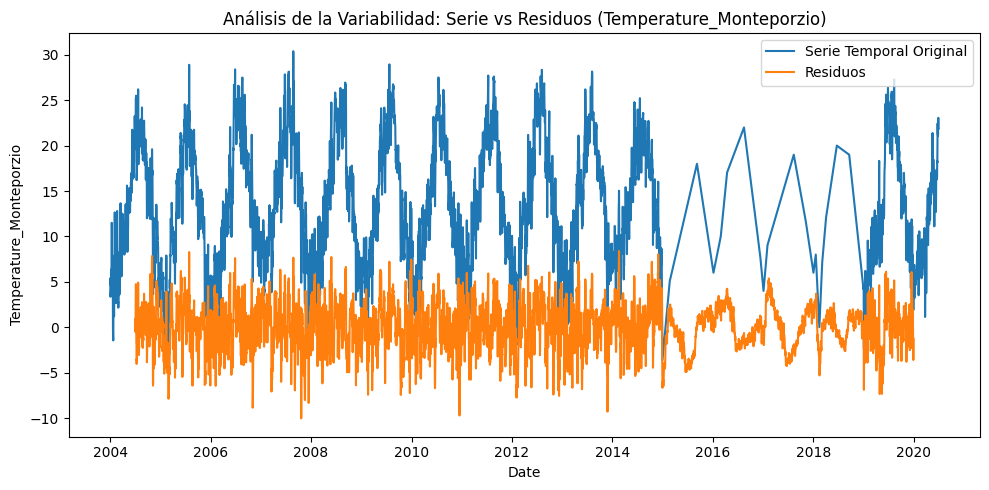

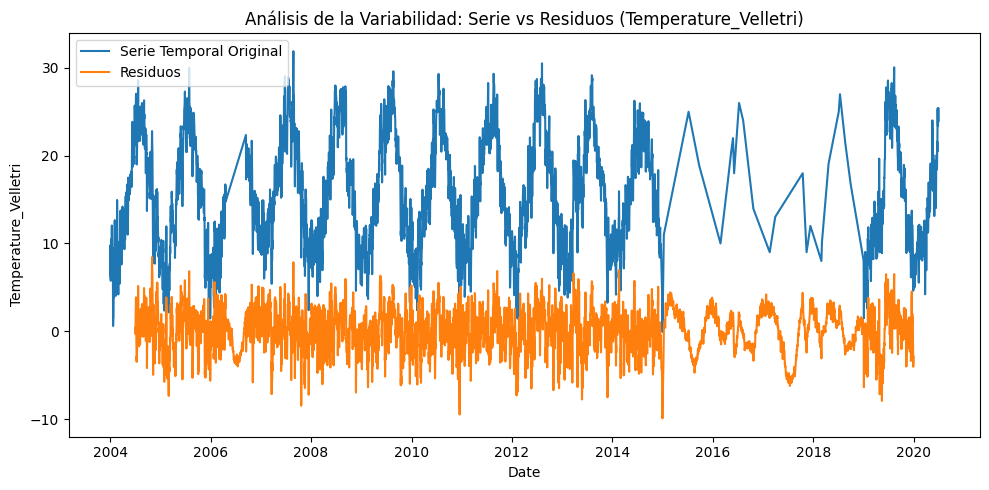

In [23]:
utils.plot_variability(df, period=365)

# Análisis de autocorrelación

<Figure size 1000x500 with 0 Axes>

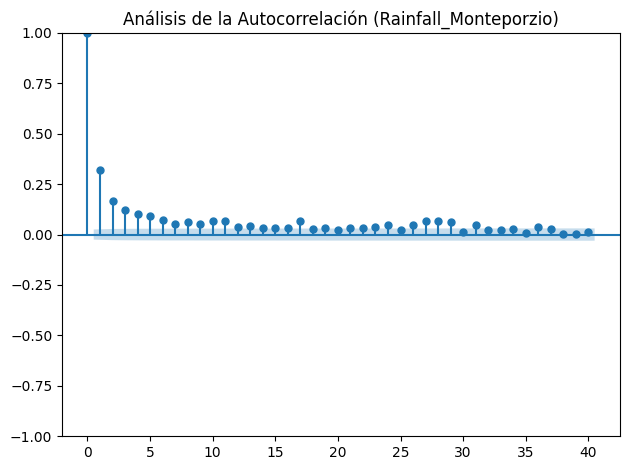

<Figure size 1000x500 with 0 Axes>

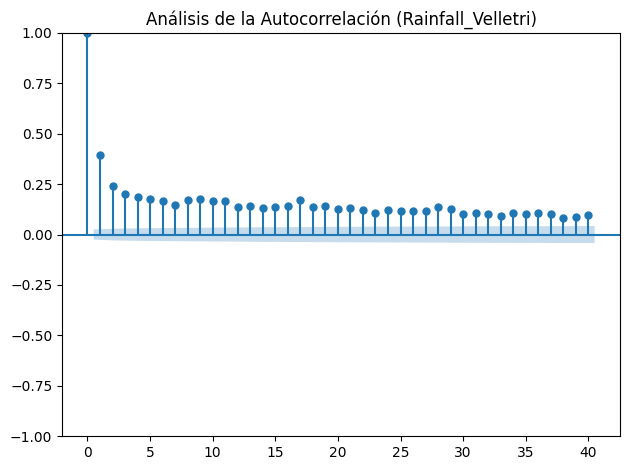

<Figure size 1000x500 with 0 Axes>

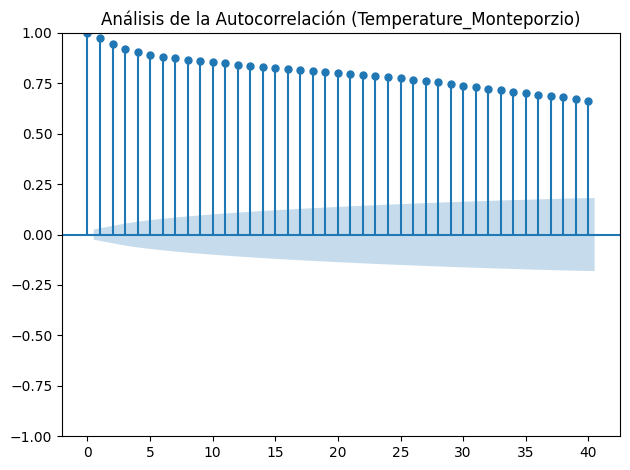

<Figure size 1000x500 with 0 Axes>

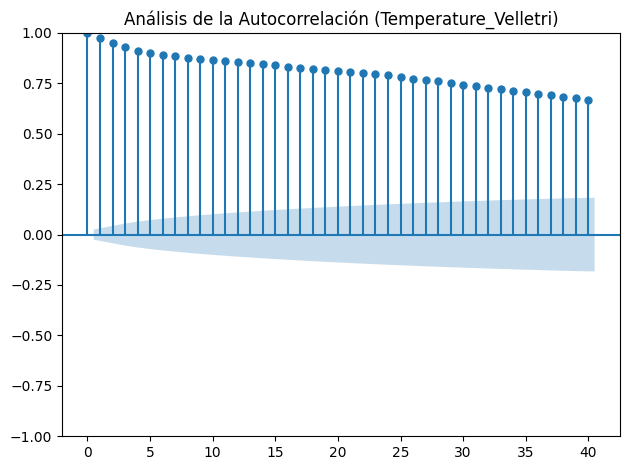

In [24]:
utils.plot_autocorrelation(df)

In [25]:
df.to_csv("../../data/processed/aquifer_doganella.csv", index=True)